**House Price Prediction<br>
A comparative statistical analysis of different types of multiple linear regression.**

#Importing libraries and packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

#Importing data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/House_Data.csv')
df.set_index('Id', inplace = True)
df.head()

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,
1,8450,196.0,150,856,856,854,1710,548,0,61,208500
2,9600,0.0,284,1262,1262,0,1262,460,298,0,181500
3,11250,162.0,434,920,920,866,1786,608,0,42,223500
4,9550,0.0,540,756,961,756,1717,642,0,35,140000
5,14260,350.0,490,1145,1145,1053,2198,836,192,84,250000


#Data Preprocessing

In [ ]:
df.dropna(inplace = True)

In [ ]:
print(df.dtypes)

LotArea          int64
MasVnrArea     float64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
GrLivArea        int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
SalePrice        int64
dtype: object


In [ ]:
df['MasVnrArea'] = df['MasVnrArea'].astype('int64')

In [ ]:
print(df.dtypes)

LotArea        int64
MasVnrArea     int64
BsmtUnfSF      int64
TotalBsmtSF    int64
1stFlrSF       int64
2ndFlrSF       int64
GrLivArea      int64
GarageArea     int64
WoodDeckSF     int64
OpenPorchSF    int64
SalePrice      int64
dtype: object


#Data Visualization

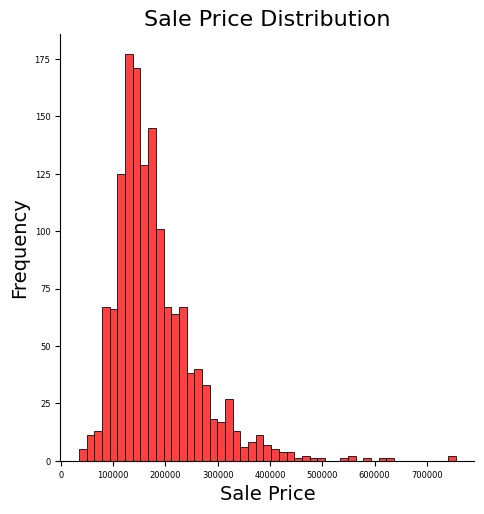

In [ ]:
sb.displot(df['SalePrice'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 6)
plt.yticks(fontsize = 6)
plt.show()

#Train-Test Split

In [ ]:
X_var = df[['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].values
y_var = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

#Multiple Linear Regression

In [ ]:
l = LinearRegression()
l.fit(X_train, y_train)
l_pred = l.predict(X_test)

In [ ]:
#y = mx + c
print(l.coef_)
print(l.intercept_)

[ 6.74063536e-02  4.16660930e+01 -8.47738499e+00  4.65822024e+01
  7.21388885e+01  8.08777271e+01 -1.43800306e+01  9.21163095e+01
  5.52941450e+01  2.58540124e+01]
-9288.815163146472


In [ ]:
tested = l.predict(X_test)
tested[5]

198178.74235990716

In [ ]:
mse = mean_squared_error(y_test,l_pred)
print(mse)

1463387105.3929498


<Figure size 300x300 with 0 Axes>

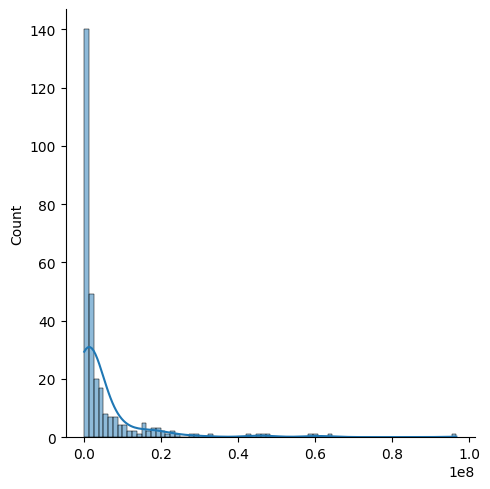

In [ ]:
fig = plt.figure(figsize=(3,3))
residuals = ((y_test- l_pred)**2)/len(y_test)
sb.displot(residuals, kde = 'true')

#Ridge Regression

In [ ]:
ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

In [ ]:
print(ridge.coef_)
print(ridge.intercept_)

[ 6.74063570e-02  4.16660934e+01 -8.47738504e+00  4.65822029e+01
  7.21388601e+01  8.08776989e+01 -1.43800028e+01  9.21163092e+01
  5.52941438e+01  2.58540101e+01]
-9288.814805208036


In [ ]:
mse2 = mean_squared_error(y_test,ridge_pred)
print(mse2)

1463387105.907563


<Axes: ylabel='Count'>

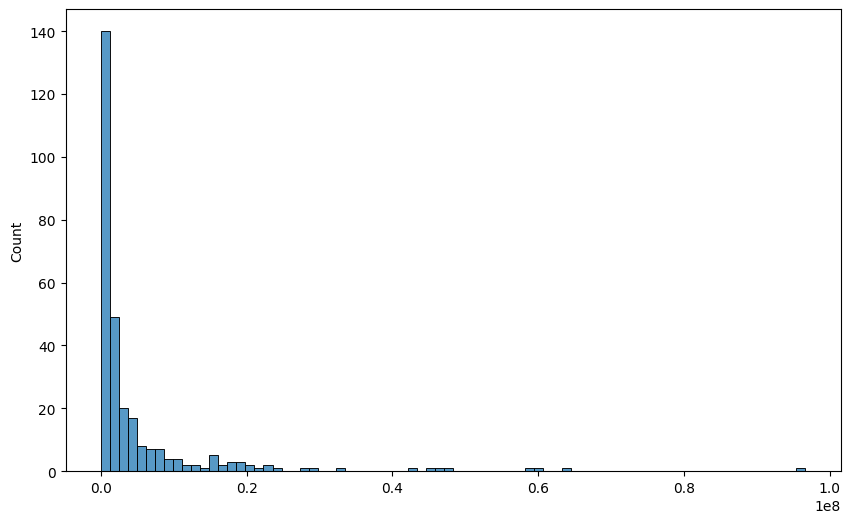

In [ ]:
fig = plt.figure(figsize=(10,6))
residuals = ((y_test- ridge_pred)**2)/len(y_test)
sb.histplot(residuals)

#Bayesian Ridge Regression

In [ ]:
bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_pred = bayesian.predict(X_test)

In [ ]:
print(bayesian.coef_)
print(bayesian.intercept_)

[ 7.25603327e-02  4.17639348e+01 -8.50273911e+00  4.70477410e+01
  4.53298617e+01  5.40104304e+01  1.23113724e+01  9.09671811e+01
  5.29819077e+01  2.21835170e+01]
-8884.03412664248


In [ ]:
mse3 = mean_squared_error(y_test,bayesian_pred)
print(mse3)

1466577739.4335241


<Axes: ylabel='Count'>

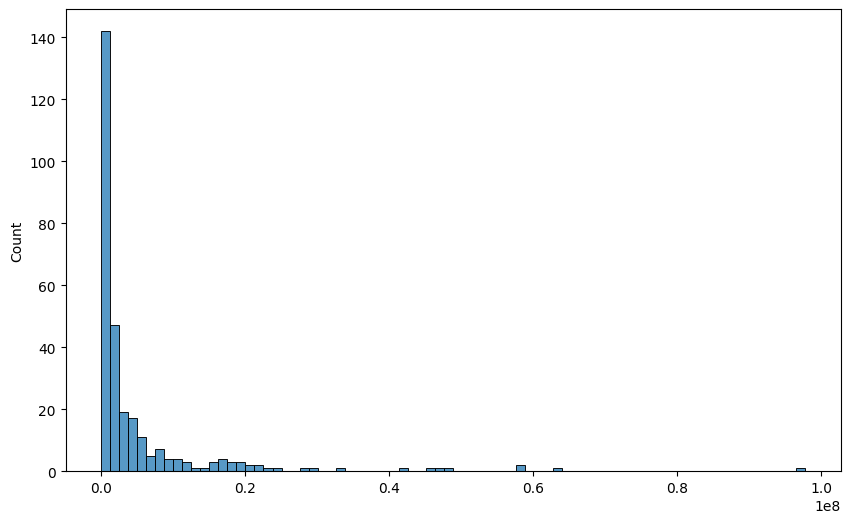

In [ ]:
fig = plt.figure(figsize=(10,6))
residuals = ((y_test- bayesian_pred)**2)/len(y_test)
sb.histplot(residuals)

In [ ]:
residuals[15]

97771140.22406408

#Best Approach

In [ ]:
min_arr = [mse,mse2,mse3]
print(min_arr)
ind = min_arr.index(min(min_arr))

[1463387105.3929498, 1463387105.907563, 1466577739.4335241]


In [ ]:
if(ind == 0):
  print("Least error is in Linear Regression")
elif(ind == 1):
  print("Least error is in Ridge Algorithm")
else:
  print("Least error is in Bayesian approach")

Least error is in Linear Regression


#Extra: Deep Learning using Keras Neural Networks

In [ ]:
import tensorflow as tf
import tensorflow
from tensorflow import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [ ]:
dataset = df.values
X_f = dataset[:,0:10]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X_f)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_f, y_var, test_size = 0.2, random_state = 0)

In [ ]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=100)
model.summary()

Epoch 1/100
37/37 [==============================] - 2s 8ms/step - loss: 38185283584.0000 - val_loss: 40783343616.0000
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 37930156032.0000 - val_loss: 40387158016.0000
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 37347565568.0000 - val_loss: 39436787712.0000
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 35955630080.0000 - val_loss: 37242511360.0000
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 32819290112.0000 - val_loss: 32303400960.0000
Epoch 6/100
37/37 [==============================] - 0s 3ms/step - loss: 26598920192.0000 - val_loss: 23155945472.0000
Epoch 7/100
37/37 [==============================] - 0s 3ms/step - loss: 17440167936.0000 - val_loss: 11859603456.0000
Epoch 8/100
37/37 [==============================] - 0s 3ms/step - loss: 11378935808.0000 - val_loss: 7455933440.0000
Epoch 9/100
37/37 [==============================

<Axes: >

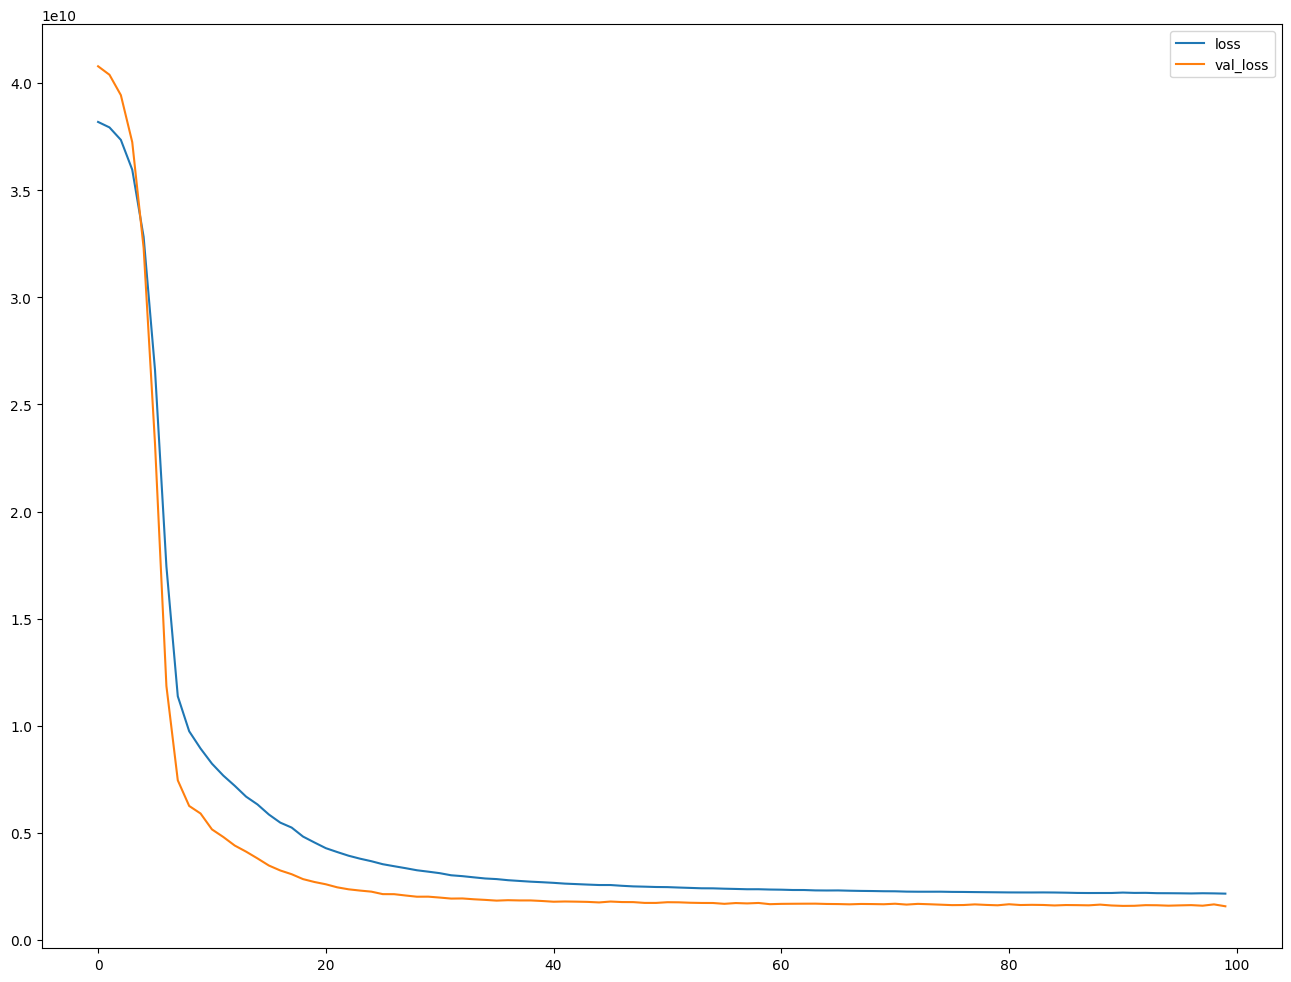

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(16,12))

In [ ]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [ ]:
mse_final = mean_squared_error(y_test, y_pred)
print('MSE:', mse_final)

MSE: 1577441199.3003125
